# Imports and Data Preparation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])


> ### X represents the features of our dataset, where each inner array is a set of features for one example (like measurements or attributes). y is the label for each example, where 0 or 1 represents the class.

## Sigmoid Function

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

> ### The sigmoid function is a special function that takes any real-valued number and maps it to a value between 0 and 1, which we can interpret as a probability.

## Cost Function

In [11]:
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = sigmoid(np.dot(X, w) + b)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

> ### The compute_cost function calculates how well our model is doing. It does this by comparing the predicted probabilities (from the sigmoid function) to the actual labels (y). The closer our predictions are to the actual labels, the lower our cost will be.

## Gradient Computation

In [12]:
def compute_gradient(X, y, w, b):
    m, n = X.shape  # m is the number of examples, n is the number of features
    dj_dw = np.zeros((n,))  # Initialize the gradient for w to zero
    dj_db = 0.  # Initialize the gradient for b to zero

    for i in range(m):  # Loop over all examples
        f_wb_i = sigmoid(np.dot(X[i], w) + b)  # Compute the prediction for example i
        err_i = f_wb_i - y[i]  # Calculate the error for example i
        for j in range(n):  # Loop over all features
            dj_dw[j] += err_i * X[i, j]  # Accumulate the gradient for w[j]
        dj_db += err_i  # Accumulate the gradient for b

    dj_dw /= m  # Average the gradient for w over all examples
    dj_db /= m  # Average the gradient for b over all examples

    return dj_dw, dj_db  # Return the gradients


> ### The compute_gradient function calculates the gradient, which tells us the direction to adjust our parameters (w and b) to reduce the cost. Think of it as a compass guiding us down a hill to the lowest point (the minimum cost).

## Gradient Descent

In [13]:
def gradient_descent(X, y, w_in, b_in, alpha, iterations):
    m, n = X.shape  # m is the number of examples, n is the number of features
    w = w_in.copy()  # Make a copy of the initial weights to avoid changing them outside the function
    b = b_in  # Start with the initial bias
    cost_history = []  # List to store the cost at each iteration

    for i in range(iterations):  # Loop over the number of iterations
        dj_dw, dj_db = compute_gradient(X, y, w, b)  # Compute gradients
        w -= alpha * dj_dw  # Update weights w by moving against the gradient
        b -= alpha * dj_db  # Update bias b by moving against the gradient
        cost_history.append(compute_cost(X, y, w, b))  # Compute and store the cost

    return w, b, cost_history  # Return the optimized weights, bias and cost history

> ### The gradient_descent function is where the learning happens. It repeatedly takes steps in the direction suggested by the compute_gradient function to find the best parameters (w and b) that minimize our cost. The size of these steps is determined by the learning rate (alpha), and we take as many steps as the number of iterations we've set.

## Training the Model

In [17]:
# Set initial values for the model parameters
w_initial = np.zeros(X.shape[1])  # Initialize weights w to zeros
b_initial = 0  # Initialize bias b to zero

# Set hyperparameters for the gradient descent algorithm
alpha = 0.01  # Set learning rate to 0.01
iterations = 1000  # Set the number of iterations to 1000

# Run the gradient descent algorithm to optimize w and b
w_optimal, b_optimal, cost_history = gradient_descent(X, y, w_initial, b_initial, alpha, iterations)

> ### Before training starts, we initialize our parameters w and b. We set a learning rate alpha and the number of iterations. The gradient_descent function then uses these to train the model, which means it finds the best values for w and b that make our predictions as accurate as possible.

## Plotting the Cost Function

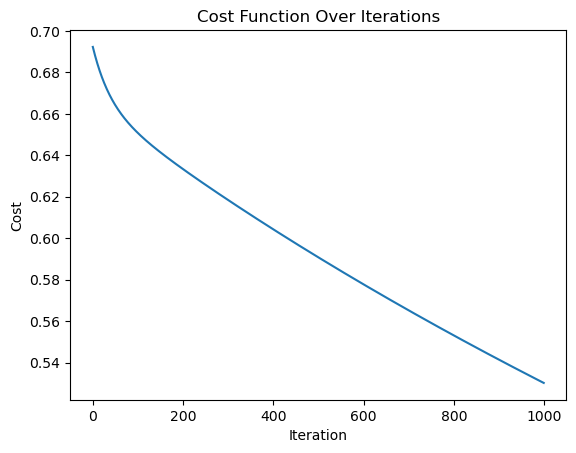

In [15]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

> ### Finally, we plot our cost over each iteration. If we see the cost going down over time, it means our model is learning and improving.

### Summary
In summary, this code is teaching a logistic regression model how to classify examples into two classes. It does this by:

1. Starting with some initial guesses for the parameters (w and b).
2. Measuring how well these parameters predict the correct class using the cost function.
3. Using gradient descent to adjust the parameters in the right direction to improve predictions.
4. Repeating steps 2 and 3 multiple times until the parameters are as good as they can be.
> After this process, we have w_optimal and b_optimal, which can be used to make predictions on new data, and the cost_history shows us how the model improved over time.